In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import numpy as np
from IPython.display import SVG
np.random.seed(13)


from keras.models import Sequential
from keras.datasets import imdb
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.utils import np_utils
from keras.utils.visualize_util import model_to_dot, plot
from keras.preprocessing import sequence

Using Theano backend.


In [2]:
max_features = 2000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
maxlen = 10
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
nb_epoch = 4

In [3]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, init='glorot_uniform', input_length=maxlen))
model.add(GRU(20, return_sequences=False))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
res_gru_1 = model.fit(X_train, y_train, batch_size=256, nb_epoch=nb_epoch, validation_data=(X_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 2s - loss: 0.6887 - acc: 0.5350 - val_loss: 0.6821 - val_acc: 0.5498
Epoch 2/4
20000/20000 [==============================] - 2s - loss: 0.6671 - acc: 0.5887 - val_loss: 0.6586 - val_acc: 0.5834
Epoch 3/4
20000/20000 [==============================] - 2s - loss: 0.6344 - acc: 0.6335 - val_loss: 0.6535 - val_acc: 0.6114
Epoch 4/4
20000/20000 [==============================] - 2s - loss: 0.5983 - acc: 0.6686 - val_loss: 0.6032 - val_acc: 0.6506


In [4]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, init='glorot_uniform', input_length=maxlen))
model.add(GRU(20, return_sequences=True))
model.add(GRU(20, return_sequences=False))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
res_gru_2 = model.fit(X_train, y_train, batch_size=256, nb_epoch=nb_epoch, validation_data=(X_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 4s - loss: 0.6897 - acc: 0.5343 - val_loss: 0.6813 - val_acc: 0.5764
Epoch 2/4
20000/20000 [==============================] - 5s - loss: 0.6641 - acc: 0.5904 - val_loss: 0.7266 - val_acc: 0.5542
Epoch 3/4
20000/20000 [==============================] - 5s - loss: 0.6300 - acc: 0.6383 - val_loss: 0.7102 - val_acc: 0.5846
Epoch 4/4
20000/20000 [==============================] - 4s - loss: 0.6017 - acc: 0.6640 - val_loss: 0.6259 - val_acc: 0.6320


In [5]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, init='glorot_uniform', input_length=maxlen))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

res_lstm_1 = model.fit(X_train, y_train, batch_size=256, nb_epoch=nb_epoch,
                    validation_data=(X_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 3s - loss: 0.6885 - acc: 0.5454 - val_loss: 0.6823 - val_acc: 0.5574
Epoch 2/4
20000/20000 [==============================] - 3s - loss: 0.6622 - acc: 0.5988 - val_loss: 0.6531 - val_acc: 0.6138
Epoch 3/4
20000/20000 [==============================] - 3s - loss: 0.6291 - acc: 0.6381 - val_loss: 0.6497 - val_acc: 0.6100
Epoch 4/4
20000/20000 [==============================] - 3s - loss: 0.6025 - acc: 0.6651 - val_loss: 0.5833 - val_acc: 0.6818


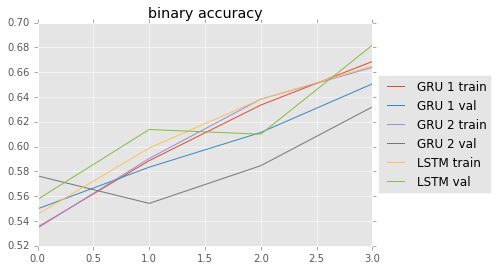

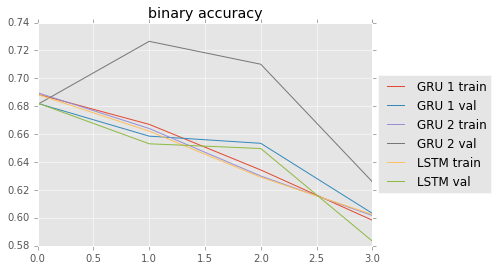

In [6]:
x = range(nb_epoch)
plt.plot(x, res_gru_1.history['acc'], label="GRU 1 train")
plt.plot(x, res_gru_1.history['val_acc'], label="GRU 1 val")
plt.plot(x, res_gru_2.history['acc'], label="GRU 2 train")
plt.plot(x, res_gru_2.history['val_acc'], label="GRU 2 val")
plt.plot(x, res_lstm_1.history['acc'], label="LSTM train")
plt.plot(x, res_lstm_1.history['val_acc'], label="LSTM val")
plt.title("binary accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, res_gru_1.history['loss'], label="GRU 1 train")
plt.plot(x, res_gru_1.history['val_loss'], label="GRU 1 val")
plt.plot(x, res_gru_2.history['loss'], label="GRU 2 train")
plt.plot(x, res_gru_2.history['val_loss'], label="GRU 2 val")
plt.plot(x, res_lstm_1.history['loss'], label="LSTM train")
plt.plot(x, res_lstm_1.history['val_loss'], label="LSTM val")
plt.title("binary accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()